# Data Preprocessing

In [460]:
# pip install imblearn

In [461]:
#load libraries
import pandas as pd
import numpy as np
from collections import Counter
from imblearn import under_sampling
import random
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [462]:
#load dataset
df = pd.read_csv('bs140513_032310.csv')
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [463]:
df.shape

(594643, 10)

In [464]:
#Check the unique values in each column
print(df.zipcodeOri.unique())
print(df.zipMerchant.unique())
print(df.gender.unique())
print(df.step.unique())
print(df.age.unique())
print(df.category.unique())
print(df.fraud.unique())

["'28007'"]
["'28007'"]
["'M'" "'F'" "'E'" "'U'"]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179]
["'4'" "'2'" "'3'" "'5'" "'1'" "'6'" "'U'" "'0'"]
["'es_transportation'" "'es_health'" "'es_otherservices'" "'es_food'"
 "'es_hotelservices'" "'es_barsandrestaurants'" "'es_tech'"
 "'es_sportsandtoys'" "'es_wellnessandb

In [465]:
#Drop zipcode columns
df = df.drop(columns=df[['zipcodeOri', 'zipMerchant']], axis=1)

In [466]:
#remove '' from dataframe
df = df.applymap(lambda x: x.replace("'", "") if isinstance(x, str) else x)

C:\Users\User\AppData\Local\Temp\ipykernel_11792\1302566896.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace("'", "") if isinstance(x, str) else x)


In [467]:
df.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,0,C1093826151,4,M,M348934600,es_transportation,4.55,0
1,0,C352968107,2,M,M348934600,es_transportation,39.68,0
2,0,C2054744914,4,F,M1823072687,es_transportation,26.89,0
3,0,C1760612790,3,M,M348934600,es_transportation,17.25,0
4,0,C757503768,5,M,M348934600,es_transportation,35.72,0


In [468]:
#rename "step" column to 'day'
df = df.rename(columns={'step':'day'})

In [469]:
df['week'] = df['day'] // 7
df

,day,customer,age,gender,merchant,category,amount,fraud,week
0,0,C1093826151,4,M,M348934600,es_transportation,4.55,0,0
1,0,C352968107,2,M,M348934600,es_transportation,39.68,0,0
2,0,C2054744914,4,F,M1823072687,es_transportation,26.89,0,0
3,0,C1760612790,3,M,M348934600,es_transportation,17.25,0,0
4,0,C757503768,5,M,M348934600,es_transportation,35.72,0,0
...,...,...,...,...,...,...,...,...,...
594638,179,C1753498738,3,F,M1823072687,es_transportation,20.53,0,25
594639,179,C650108285,4,F,M1823072687,es_transportation,50.73,0,25
594640,179,C123623130,2,F,M349281107,es_fashion,22.44,0,25
594641,179,C1499363341,5,M,M1823072687,es_transportation,14.46,0,25


In [470]:
df = df[df['age'] != '0']
df = df[df['age'] != 'u']
df = df[df['gender'] != 'U']
df = df[df['gender'] != 'E']

In [471]:
df.groupby('merchant')['amount'].mean().sort_values(ascending=False)

merchant
M732195782     2324.270066
M2080407379    2299.512292
M495352832     1618.723043
M1726401631     855.920000
M1873032707     378.204170
M1353266412     377.828462
M857378720      358.101983
M2011752106     324.279835
M2122776122     315.188669
M980657600      300.064622
M1294758098     290.209894
M3697346        288.641443
M17379832       249.471893
M480139044      245.191501
M923029380      207.255062
M1741626453     172.811164
M840466850      137.328338
M1888755466     136.334091
M933210764      125.573043
M1649169323     122.748779
M348875670      120.740467
M50039827       120.735257
M1400236507     115.601704
M1872033263     114.820134
M692898500      110.665973
M1352454843     108.940932
M117188757      105.102381
M1913465890     104.263712
M1053599405     103.143883
M45060432       102.893754
M1842530320      99.301292
M1788569036      94.689779
M1198415165      94.406744
M1416436880      90.684977
M547558035       83.954599
M1748431652      76.984170
M1535107174      74

In [472]:
quartiles = df.groupby('merchant')['amount'].quantile([0.25, 0.5, 0.75])
def merch_quartile(row):
    merchant = row['merchant']
    amount = row['amount']
    quartile = 1
    if amount >= quartiles[merchant][0.25]:
        quartile = 2
    if amount >= quartiles[merchant][0.5]:
        quartile = 3
    if amount >= quartiles[merchant][0.75]:
        quartile = 4
    return quartile

df['merch_quartile'] = df.apply(merch_quartile, axis=1)

display(df)

,day,customer,age,gender,merchant,category,amount,fraud,week,merch_quartile
0,0,C1093826151,4,M,M348934600,es_transportation,4.55,0,0,1
1,0,C352968107,2,M,M348934600,es_transportation,39.68,0,0,4
2,0,C2054744914,4,F,M1823072687,es_transportation,26.89,0,0,3
3,0,C1760612790,3,M,M348934600,es_transportation,17.25,0,0,2
4,0,C757503768,5,M,M348934600,es_transportation,35.72,0,0,3
...,...,...,...,...,...,...,...,...,...,...
594638,179,C1753498738,3,F,M1823072687,es_transportation,20.53,0,25,2
594639,179,C650108285,4,F,M1823072687,es_transportation,50.73,0,25,4
594640,179,C123623130,2,F,M349281107,es_fashion,22.44,0,25,1
594641,179,C1499363341,5,M,M1823072687,es_transportation,14.46,0,25,2


In [473]:
df.groupby('customer')['amount'].quantile([0.25, 0.5, 0.75])

customer         
C1000148617  0.25    14.7900
             0.50    26.1400
             0.75    45.4550
C100045114   0.25    18.0000
             0.50    35.1300
                      ...   
C999393223   0.50    26.0000
             0.75    44.8375
C999723254   0.25     7.9950
             0.50    24.5400
             0.75    36.8850
Name: amount, Length: 12234, dtype: float64

In [474]:
quartiles = df.groupby('customer')['amount'].quantile([0.25, 0.5, 0.75])
def customer_quartile(row):
    merchant = row['customer']
    amount = row['amount']
    quartile = 1
    if amount >= quartiles[merchant][0.25]:
        quartile = 2
    if amount >= quartiles[merchant][0.5]:
        quartile = 3
    if amount >= quartiles[merchant][0.75]:
        quartile = 4
    return quartile

df['customer_quartile'] = df.apply(customer_quartile, axis=1)

display(df)

,day,customer,age,gender,merchant,category,amount,fraud,week,merch_quartile,customer_quartile
0,0,C1093826151,4,M,M348934600,es_transportation,4.55,0,0,1,1
1,0,C352968107,2,M,M348934600,es_transportation,39.68,0,0,4,3
2,0,C2054744914,4,F,M1823072687,es_transportation,26.89,0,0,3,2
3,0,C1760612790,3,M,M348934600,es_transportation,17.25,0,0,2,2
4,0,C757503768,5,M,M348934600,es_transportation,35.72,0,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...
594638,179,C1753498738,3,F,M1823072687,es_transportation,20.53,0,25,2,2
594639,179,C650108285,4,F,M1823072687,es_transportation,50.73,0,25,4,4
594640,179,C123623130,2,F,M349281107,es_fashion,22.44,0,25,1,2
594641,179,C1499363341,5,M,M1823072687,es_transportation,14.46,0,25,2,2


In [475]:
#Add the total number of transactions for each customer from merchants
df['no_transactions'] = df.groupby(['customer', 'merchant'])['customer'].transform('count')

In [476]:
#Average number of weekly transactions of each customer
df['cust_weekly_trans'] = df.groupby(['week', 'customer'])['day'].transform('count')

In [477]:
#Average number of weekly transactions of each merchant
df['merch_weekly_trans'] = df.groupby(['week', 'merchant'])['day'].transform('count')

In [478]:
df.head()

,day,customer,age,gender,merchant,category,amount,fraud,week,merch_quartile,customer_quartile,no_transactions,cust_weekly_trans,merch_weekly_trans
0,0,C1093826151,4,M,M348934600,es_transportation,4.55,0,0,1,1,154,7,11340
1,0,C352968107,2,M,M348934600,es_transportation,39.68,0,0,4,3,65,7,11340
2,0,C2054744914,4,F,M1823072687,es_transportation,26.89,0,0,3,2,22,7,3262
3,0,C1760612790,3,M,M348934600,es_transportation,17.25,0,0,2,2,55,6,11340
4,0,C757503768,5,M,M348934600,es_transportation,35.72,0,0,3,3,73,6,11340


In [479]:
df = pd.get_dummies(df, columns= ['gender', 'category','age'])
df.head()

,day,customer,merchant,amount,fraud,week,merch_quartile,customer_quartile,no_transactions,cust_weekly_trans,...,category_es_tech,category_es_transportation,category_es_travel,category_es_wellnessandbeauty,age_1,age_2,age_3,age_4,age_5,age_6
0,0,C1093826151,M348934600,4.55,0,0,1,1,154,7,...,False,True,False,False,False,False,False,True,False,False
1,0,C352968107,M348934600,39.68,0,0,4,3,65,7,...,False,True,False,False,False,True,False,False,False,False
2,0,C2054744914,M1823072687,26.89,0,0,3,2,22,7,...,False,True,False,False,False,False,False,True,False,False
3,0,C1760612790,M348934600,17.25,0,0,2,2,55,6,...,False,True,False,False,False,False,True,False,False,False
4,0,C757503768,M348934600,35.72,0,0,3,3,73,6,...,False,True,False,False,False,False,False,False,True,False


In [480]:
X = df.drop('fraud', axis=1)
Y = df.fraud

In [481]:
#number of fraud/non-fraud cases
print(sorted(Counter(df.fraud).items()))

[(0, 583353), (1, 7145)]


In [482]:
#percentage of fraud instances out of the total
round(df.fraud[df.fraud == 1].count() * 100 / df.shape[0], 2)

1.21

In [483]:
#undesample the non-fraud cases
random.seed(7406)
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 0)
X_smpl, Y_smpl = rus.fit_resample(X, Y)
print(sorted(Counter(Y_smpl).items()), Y_smpl.shape)

[(0, 7145), (1, 7145)] (14290,)


In [484]:
# X_smpl['fraud'] = Y_smpl

In [485]:
# df_smpl = X_smpl.sort_values(by=['day']).reset_index(drop=True, inplace=False)
# df_smpl.head()

In [486]:
#split dataset to 80/20 training & testing (for testing performance)
X_train, X_test, y_train, y_test = train_test_split(X,Y, 
                                   random_state=7406,  
                                   test_size=0.2,  
                                   shuffle=True) 

In [487]:
#split dataset to 80/20 training & testing (for building the models)
X_strain, X_stest, y_strain, sy_test = train_test_split(X_smpl,Y_smpl, 
                                   random_state=7406,  
                                   test_size=0.2,  
                                   shuffle=True) 

# Modeling without categorical variables

We will start by removing all categorical variable and build the models accordingly.

In [488]:
X_train = X_train.drop(columns=['day', 'customer', 'merchant'])
X_test = X_test.drop(columns=['day', 'customer', 'merchant'])
X_strain = X_strain.drop(columns=['day', 'customer', 'merchant'])
X_stest = X_stest.drop(columns=['day', 'customer', 'merchant'])

In [489]:
#Model 1: KNN
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_strain, y_strain)
pred = knn.predict(X_test)
 
# Predictions and Evaluations
# Let's evaluate our KNN model !
confusion = confusion_matrix(y_test, pred)
print(confusion)
print(classification_report(y_test, pred))

[[112528   4159]
 [    79   1334]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    116687
           1       0.24      0.94      0.39      1413

    accuracy                           0.96    118100
   macro avg       0.62      0.95      0.68    118100
weighted avg       0.99      0.96      0.97    118100



In [490]:
# #SVM
# d = {'Income': ins_feat['Income'], 'CIRatio': ins_feat['Cov_Income_Ratio']}
# df = pd.DataFrame(data=d)

# svm = OneClassSVM(gamma=0.000005, nu = 0.03).fit_predict(df)

# df['svm'] = svm

# df['fraud_flag'] = df['svm'] < 0

# df['fraud_flag'] = df['fraud_flag'].astype("int")
# #
# df.head()

In [491]:
#Naive Bayes
NB = GaussianNB().fit(X_strain, y_strain)

pred2 = NB.predict(X_test)
confusion = confusion_matrix(y_test, pred2)
print(confusion)
print(classification_report(y_test, pred2))

[[106649  10038]
 [     4   1409]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.96    116687
           1       0.12      1.00      0.22      1413

    accuracy                           0.91    118100
   macro avg       0.56      0.96      0.59    118100
weighted avg       0.99      0.91      0.95    118100



Text(0.5, 0, 'Random Forest Feature Importance')

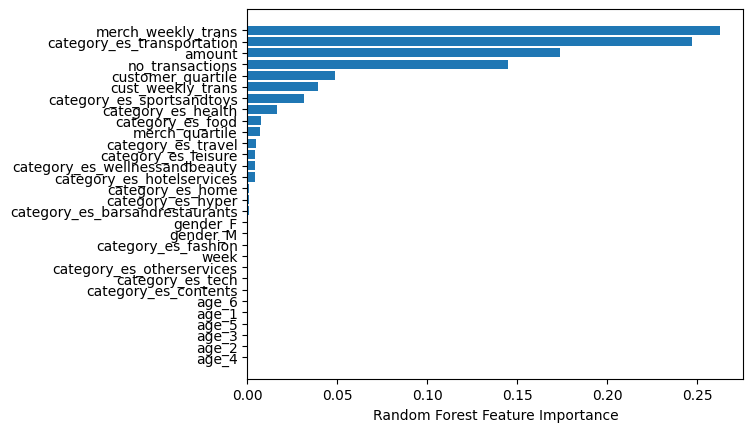

In [492]:
#Random Forest
RF = RandomForestClassifier(max_depth = 3, n_estimators = 500).fit(X_strain, y_strain)

importances = RF.feature_importances_

sorted_idx = RF.feature_importances_.argsort()

plt.barh(X_strain.columns[sorted_idx], RF.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [496]:
pred3 = RF.predict(X_test)
confusion = confusion_matrix(y_test, pred3)
print(confusion)
print(classification_report(y_test, pred3))

[[107154   9533]
 [     4   1409]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    116687
           1       0.13      1.00      0.23      1413

    accuracy                           0.92    118100
   macro avg       0.56      0.96      0.59    118100
weighted avg       0.99      0.92      0.95    118100



In [494]:
TP = confusion[0,0]
TN = confusion[1,1]
FP = confusion[0,1]
FN = confusion[1,0]

Specificity = TN / (TN + FP)
print(Specificity)

Precision = TP / (TP + FP)
print(Precision)

NVP = TN / (TN + FN)
print(NVP)
1- NVP



0.12876987753609942
0.9183028100816715
0.997169143665959


0.0028308563340410098